# **The IMDb Movie Ratings & Sentiment Analysis**

**Introduction**

The IMDb Movie Ratings & Sentiment Analysis project involves analyzing movie ratings, genres, and public sentiment to identify trends and patterns. The project aims to answer key questions about movie genres, runtime, and box office success.


In [167]:
import pandas as pd
from IPython.display import Image, display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**LOAD SET**

In [169]:
# Load the dataset
imdb_data = pd.read_csv('imdb_top_1000.csv')

In [170]:
# Take a look at the first few rows
imdb_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [171]:
imdb_data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [172]:
imdb_data.isnull().sum()


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

**Handling Missing Values**

In [174]:
# Drop rows with missing values in the certificate column
imdb_data.dropna(subset=["Certificate"], inplace=True)

In [175]:
# Impute missing values in the gross column with the median value
imdb_data.dropna(subset = ["Gross"], inplace=True)

In [176]:
# Impute missing values in the meta_score column with the median value
median_meta_score = imdb_data["Meta_score"].median()
imdb_data["Meta_score"].fillna(median_meta_score, inplace=True)


In [177]:
imdb_data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [178]:
imdb_data.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

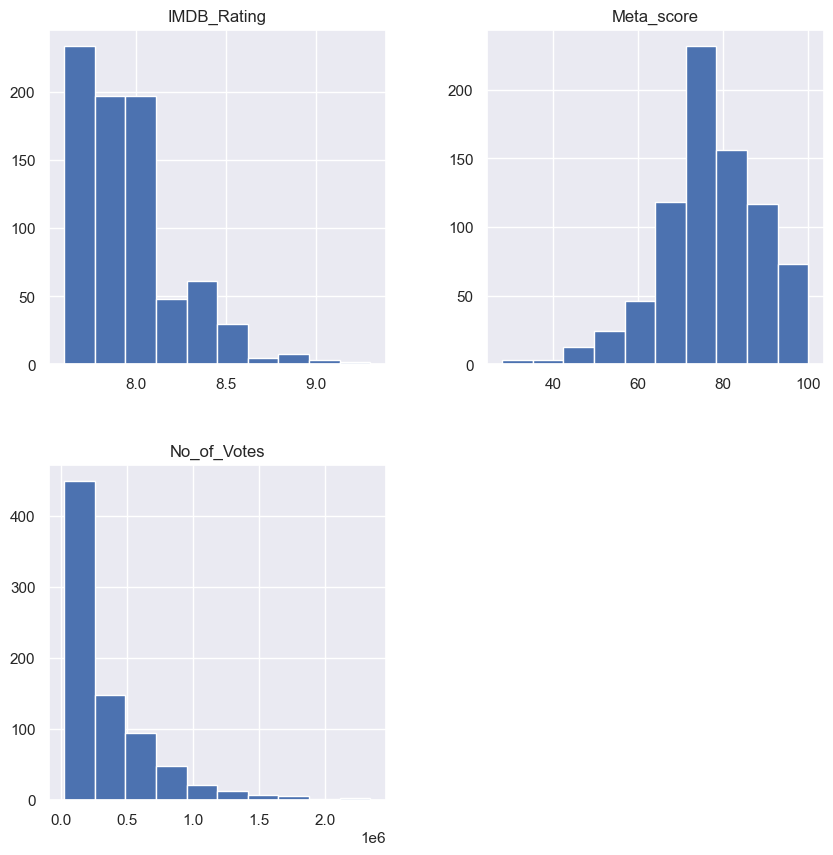

In [179]:
# Plot histograms for numerical columns
sns.set()
imdb_data.hist(figsize=(10, 10))
plt.show()

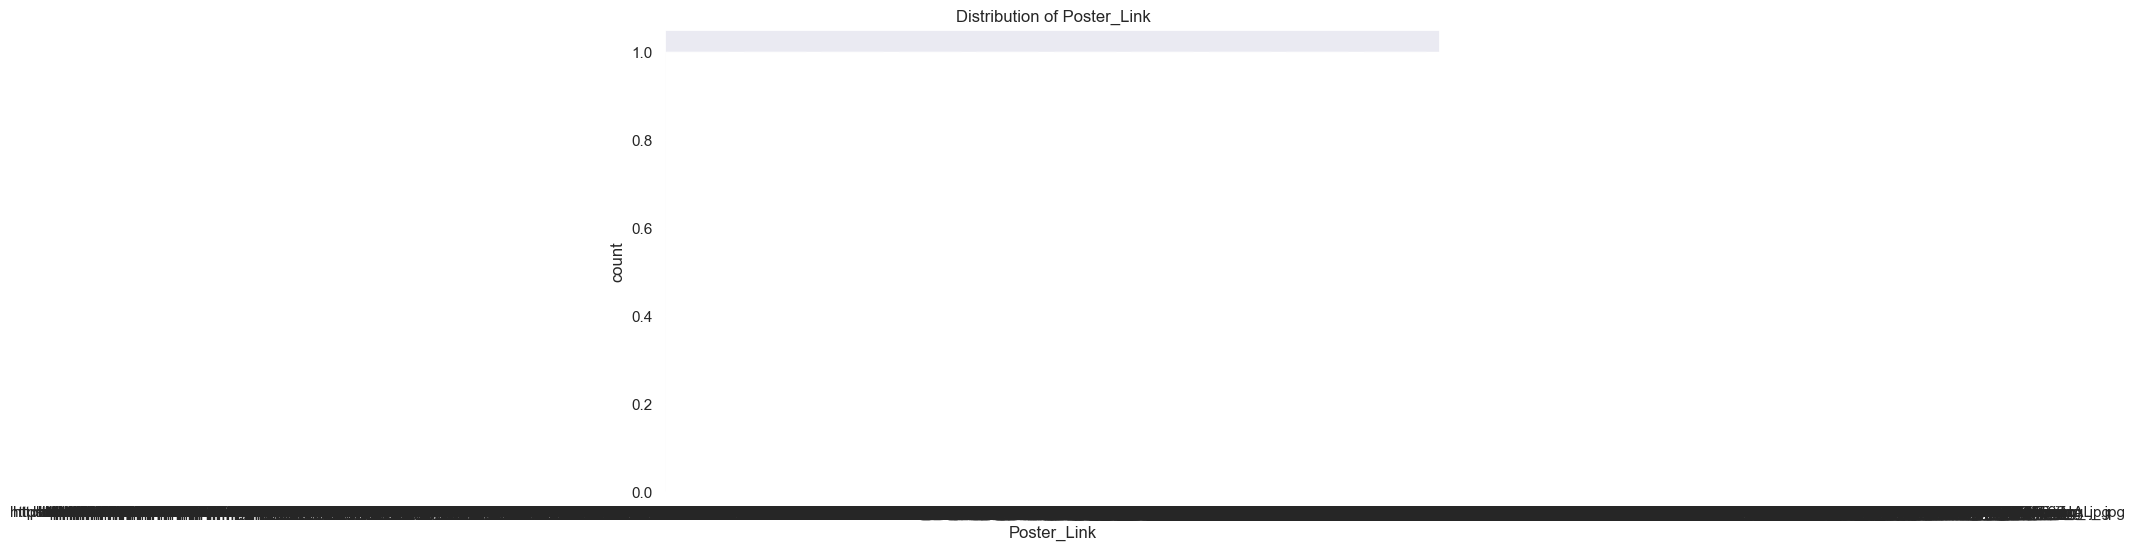

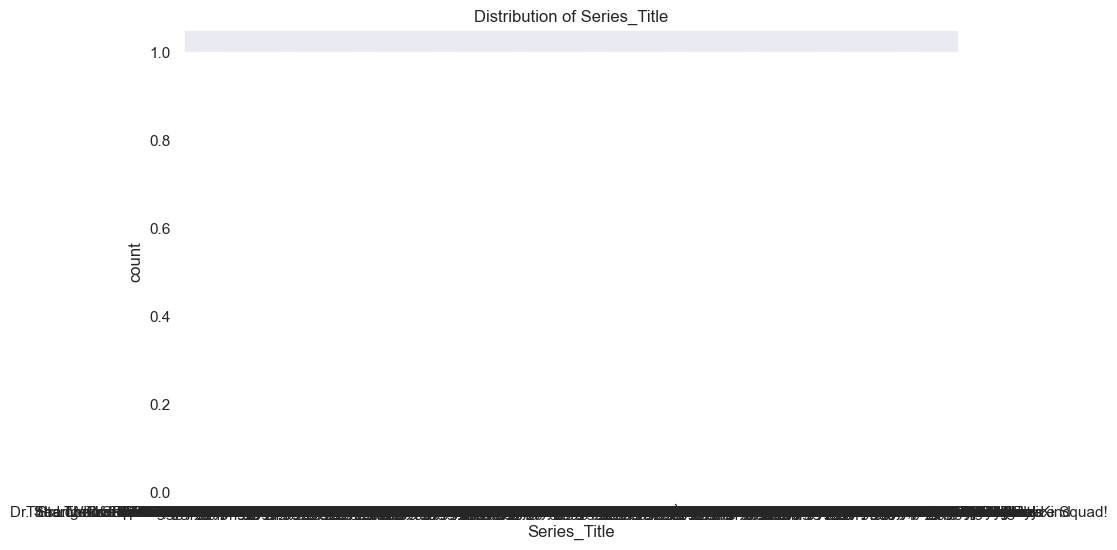

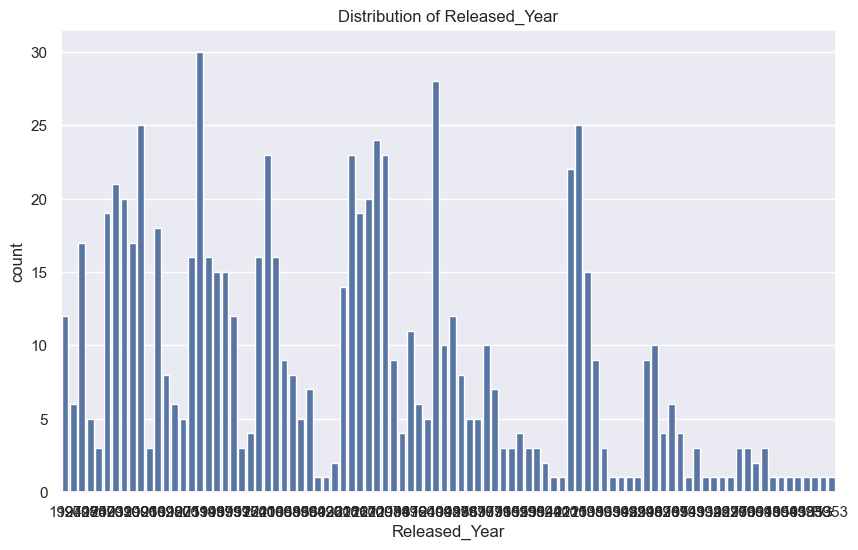

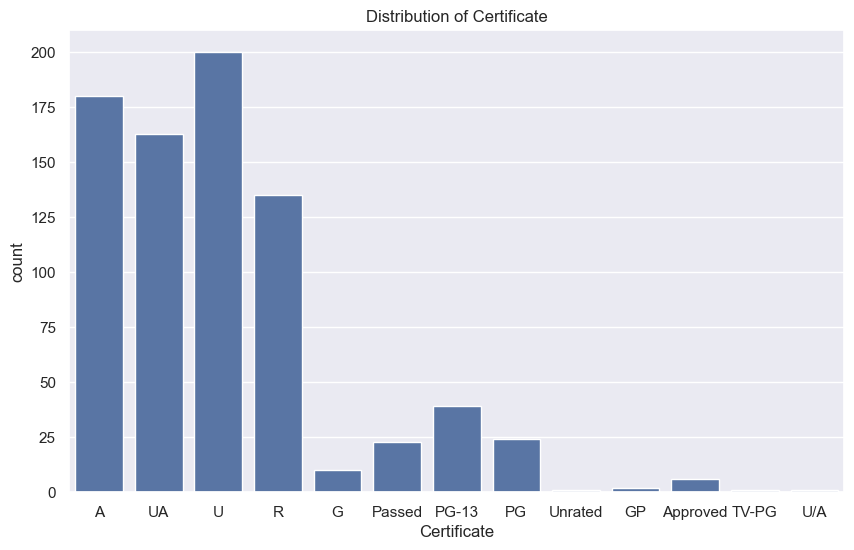

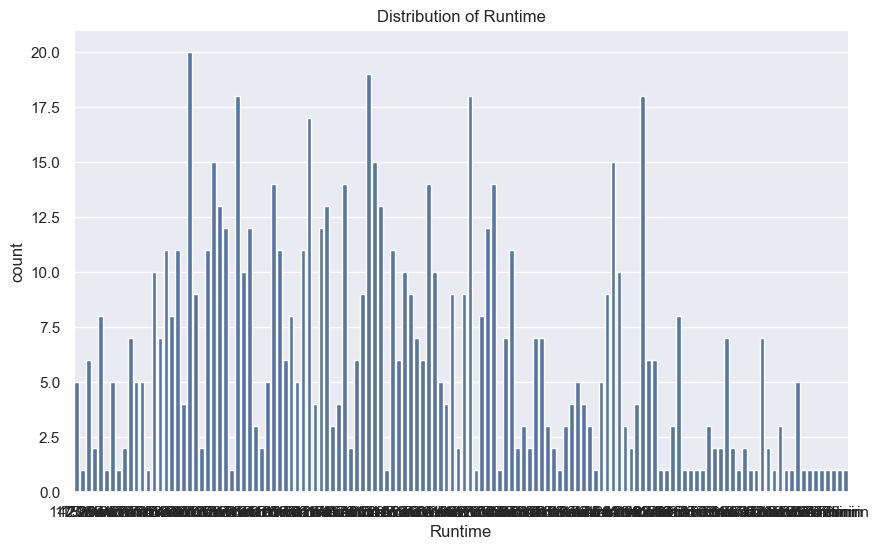

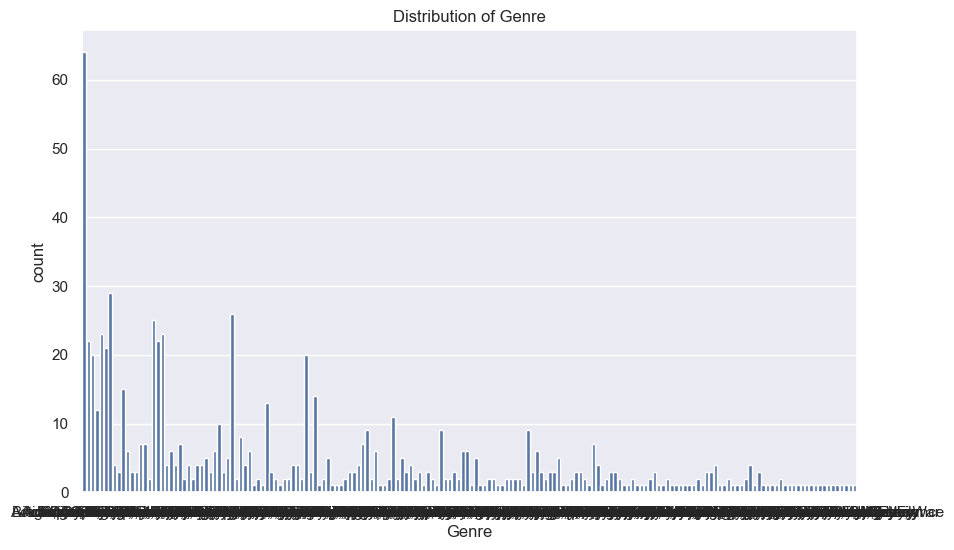

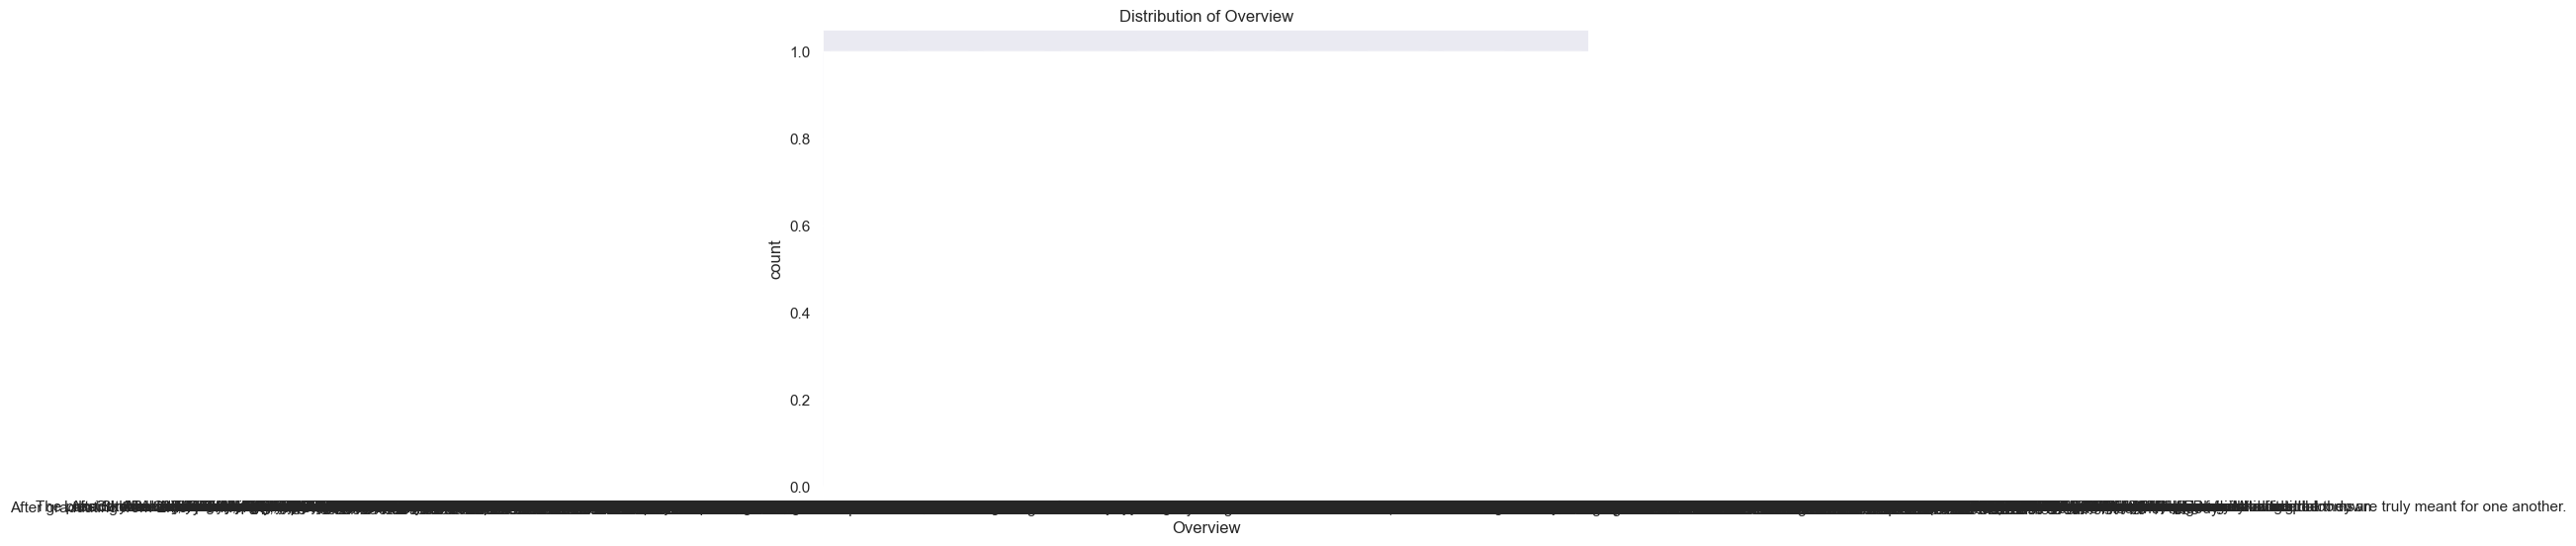

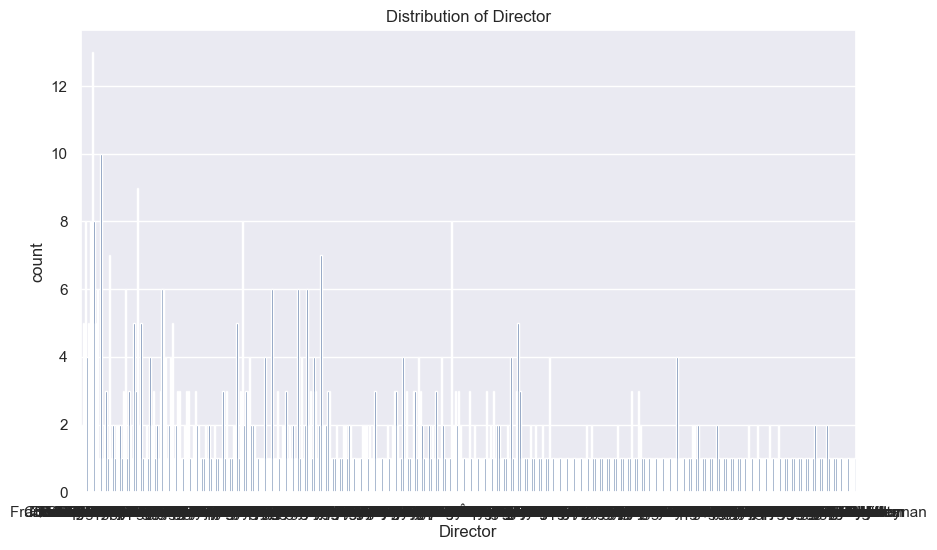

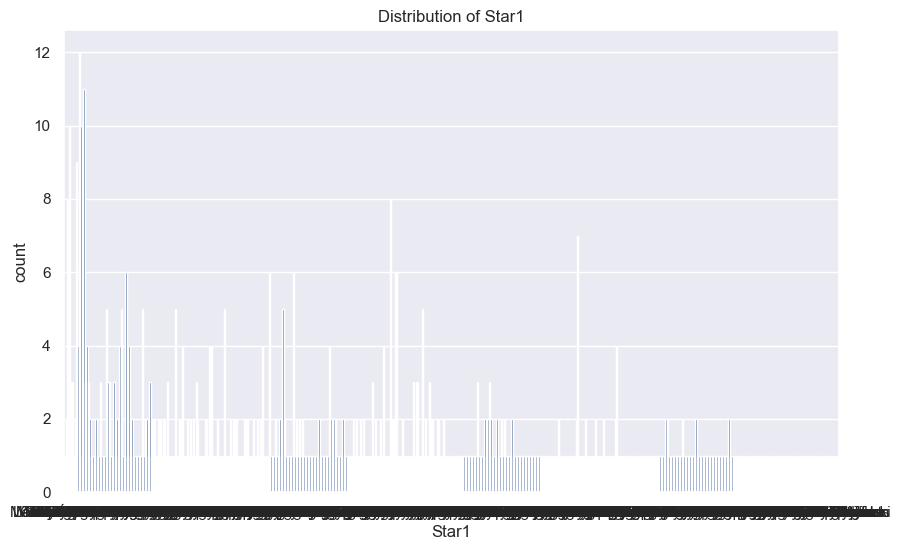

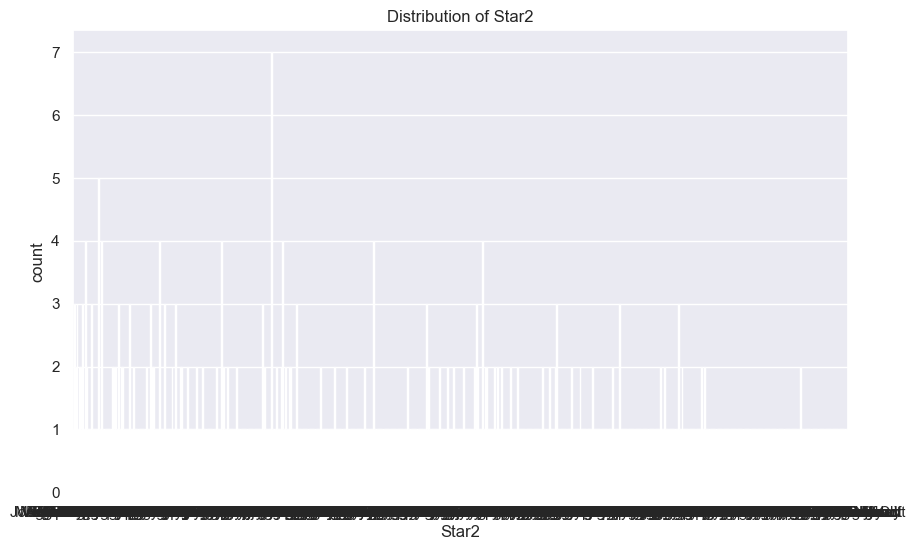

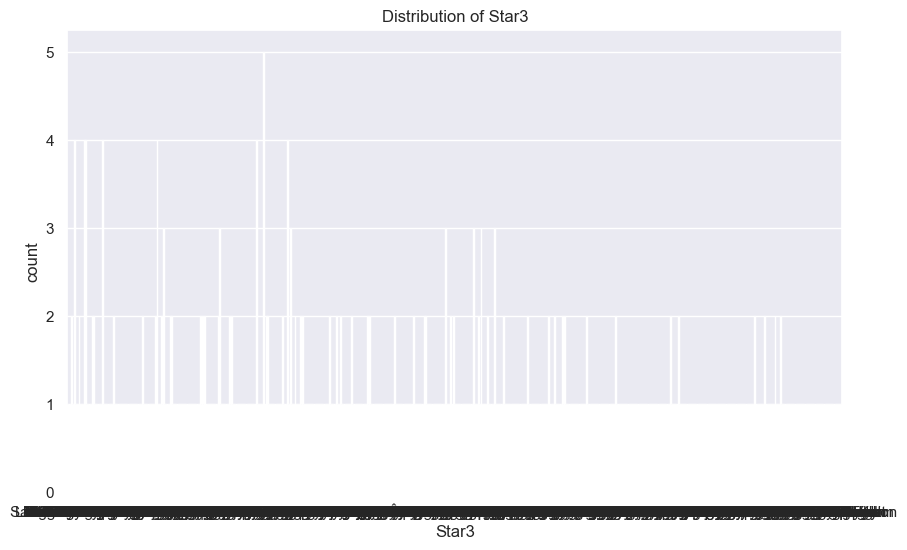

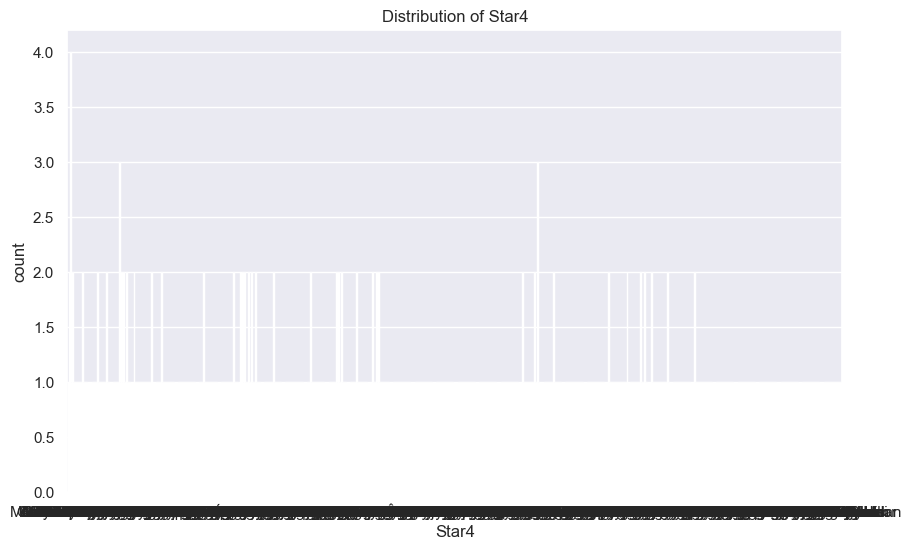

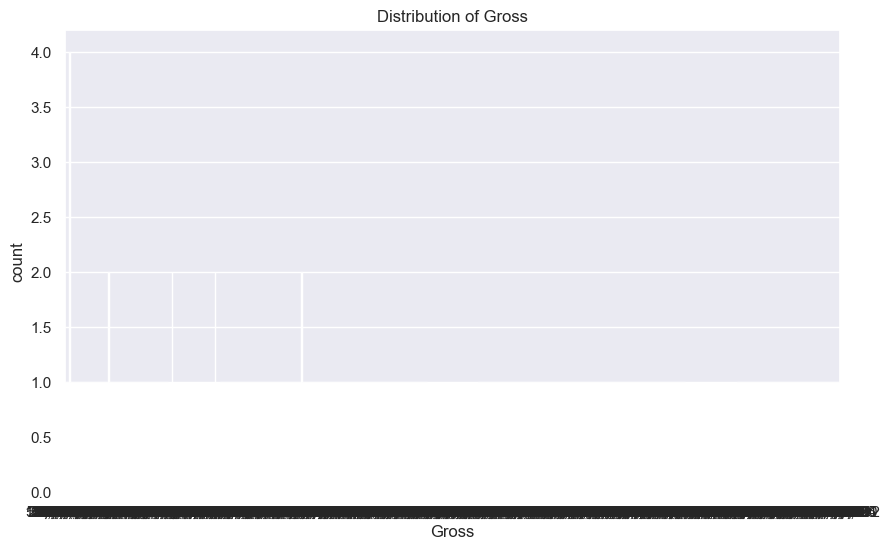

In [180]:
# Plot bar charts for categorical columns
for col in imdb_data.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=imdb_data)
    plt.title(f'Distribution of {col}')
    plt.show()

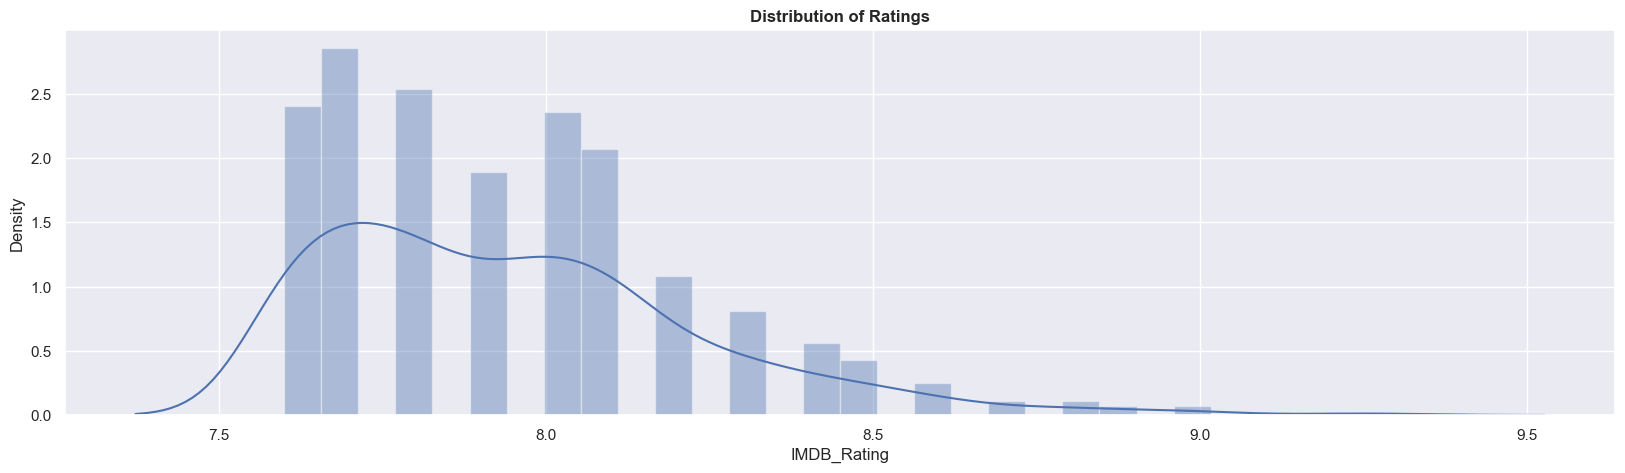

In [181]:
# Plot the distribution of movie ratings
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(imdb_data['IMDB_Rating'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()


# Genre Analysis
1. Calculate average ratings by genre.
2. Visualize top-rated genres using bar charts.
3. Identify trends and patterns.

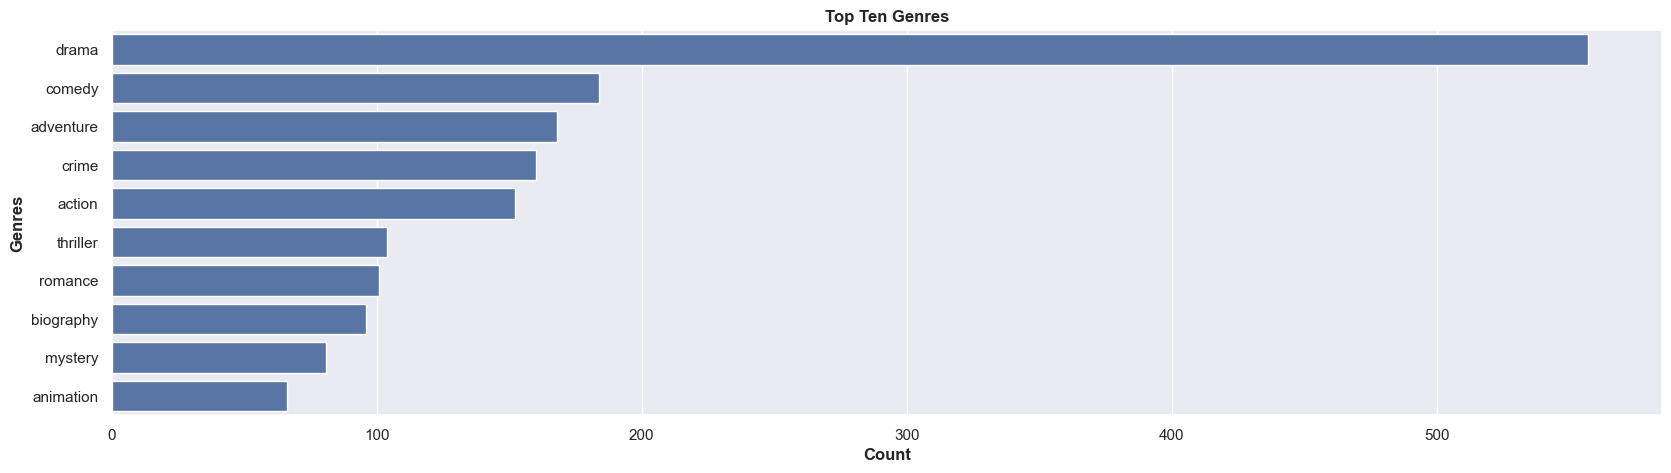

In [183]:
genre = []
for x in imdb_data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:10]
x, y = map(list, zip(*count))

fig, axs = plt.subplots(figsize=(20, 5))
sns.barplot(x=y, y=x, ax=axs)
axs.set_ylabel("Genres", weight="bold")
axs.set_xlabel("Count", weight="bold")
axs.set_title("Top Ten Genres", weight="bold")
plt.show()

## Runtime Analysis
1. Calculate correlation between runtime and ratings.
2. Visualize using scatter plots.
3. Identify potential relationships.


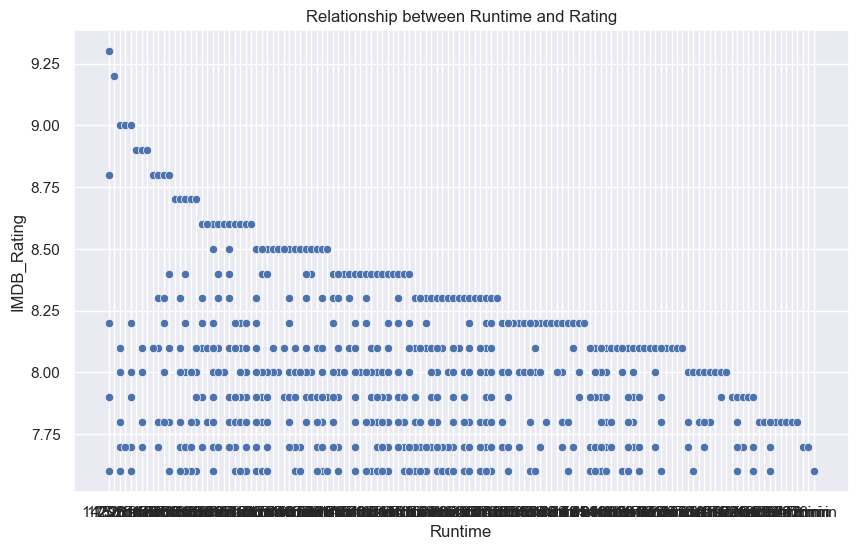

In [185]:
# Plot the relationship between runtime and rating
plt.figure(figsize=(10,6))
sns.scatterplot(x=imdb_data["Runtime"], y=imdb_data["IMDB_Rating"])
plt.title("Relationship between Runtime and Rating")
plt.show()


## Sentiment Analysis

In [187]:
#conduct sentiment analysis on the reviews. We'll use the NLTK library to perform sentiment analysis.

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

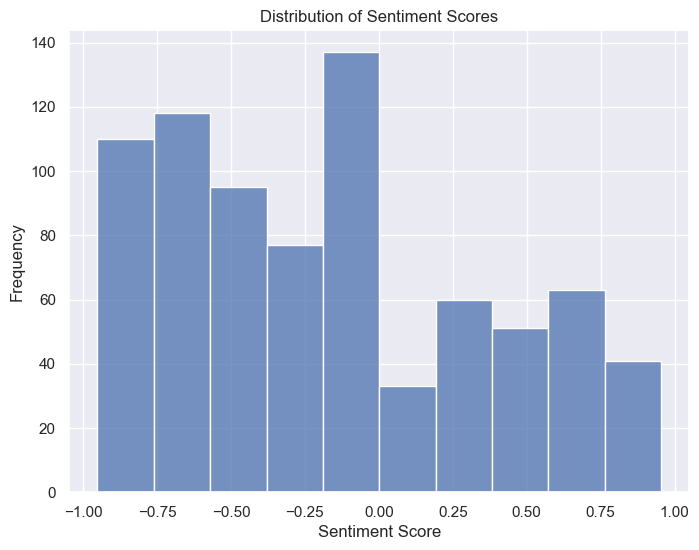

In [188]:
 from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
plot_sentiment_distribution(imdb_data, "Overview", analyzer)

#### Recommendation System (Optional)


In [190]:
# Define a function to recommend movies
def recommend_movies(imdb_data, genre, num_movies):
    recommended_movies = imdb_data[imdb_data["Genre"].str.contains(genre, case=False)].sort_values(by="IMDB_Rating", ascending=False).head(num_movies)
    return recommended_movies

# Recommend 5 movies from the Action genre
recommended_movies = recommend_movies(imdb_data, "Action", 5)
print(recommended_movies)


                                          Poster_Link  \
2   https://m.media-amazon.com/images/M/MV5BMTMxNT...   
5   https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
8   https://m.media-amazon.com/images/M/MV5BMjAxMz...   
10  https://m.media-amazon.com/images/M/MV5BN2EyZj...   
13  https://m.media-amazon.com/images/M/MV5BZGMxZT...   

                                         Series_Title Released_Year  \
2                                     The Dark Knight          2008   
5       The Lord of the Rings: The Return of the King          2003   
8                                           Inception          2010   
10  The Lord of the Rings: The Fellowship of the Ring          2001   
13              The Lord of the Rings: The Two Towers          2002   

   Certificate  Runtime                      Genre  IMDB_Rating  \
2           UA  152 min       Action, Crime, Drama          9.0   
5            U  201 min   Action, Adventure, Drama          8.9   
8           UA  148 min  Acti

#### Summary

This project involved analyzing the IMDb movie dataset to explore trends in movie ratings, genres, and public sentiment. The key tasks included:

Data cleaning and handling missing values
Exploratory data analysis (EDA) to understand the distribution of movie ratings, genres, and runtime
Sentiment analysis on movie overviews
Building a recommendation system to suggest movies based on genre


#### Conclusion

The project provided valuable insights into the IMDb movie dataset, including:

The distribution of movie ratings and genres
The relationship between runtime and movie ratings
Sentiment analysis of movie overviews
A recommendation system that suggests movies based on genre


The findings can be useful for movie enthusiasts, producers, and studios to understand what makes a movie successful and how to improve their content. The recommendation system can be further improved by incorporating more features and using advanced machine learning algorithms.